# Cabinet Start-Up Procedure

1. Turn on cabinet power in back of cabinet
2. Turn on sensor power (24 Volts). The sensor power inputs are labeled.
3. Compile code to AMDC
4. Turn on power to DC bus of cabinet.
5. Run Jupyter Notebook. 

Import neccessary modules

In [352]:
amdc.disconnect()


In [353]:
from Cabinet_Test import cmd
import sys
sys.path.append(r'..\AMDC-Firmware\scripts')

In [354]:
from AMDC import AMDC

In [355]:
amdc = AMDC(port = 'COM13', cmdEcho = True, printOutput=True)

In [356]:
Vdc = 20
cmd = cmd(Vdc, amdc, debug = False)   

	> cabinet setup 20.00000
['cabinet setup 20.00000', 'SUCCESS']
	> cabinet init_cb
['cabinet init_cb', 'SUCCESS']


In [357]:
cmd.init_twin_ctrl()
cmd.twin_set_vdc(20)
cmd.twin_set_trq(0,0)
cmd.twin_set_s1(0,0)
cmd.twin_set_s2(0,0)
cmd.twin_set_freq(0)
cmd.enable_pwm()
cmd.twin_enable_ctrl()

	> twin init
['twin init', 'SUCCESS']
	> twin set_vdc 20.000000
['twin set_vdc 20.000000', 'SUCCESS']
	> twin set_trq 0.000000 0.000000
['twin set_trq 0.000000 0.000000', 'SUCCESS']
	> twin set_s1 0.000000 0.000000
['twin set_s1 0.000000 0.000000', 'SUCCESS']
	> twin set_s2 0.000000 0.000000
['twin set_s2 0.000000 0.000000', 'SUCCESS']
	> twin set_freq 0.000000
['twin set_freq 0.000000', 'SUCCESS']
	> hw pwm on
['hw pwm on', 'SUCCESS']
	> twin enable_ctrl
['twin enable_ctrl', 'SUCCESS']


In [370]:
cmd.twin_set_trq(0,5)
cmd.twin_set_s1(0,1)
cmd.twin_set_s2(0,0)
cmd.twin_set_freq(10)


	> twin set_trq 0.000000 5.000000
['twin set_trq 0.000000 5.000000', 'SUCCESS']
	> twin set_s1 0.000000 1.000000
['twin set_s1 0.000000 1.000000', 'SUCCESS']
	> twin set_s2 0.000000 0.000000
['twin set_s2 0.000000 0.000000', 'SUCCESS']
	> twin set_freq 10.000000
['twin set_freq 10.000000', 'SUCCESS']


In [236]:
cmd.twin_disable_ctrl()
cmd.disable_pwm()

	> twin disable_ctrl
['twin disable_ctrl', 'SUCCESS']
	> hw pwm off
['hw pwm off', 'SUCCESS']


In [ ]:
cmd.twin_enable_ctrl()

In [137]:
cmd.twin_set_freq(10)
cmd.twin_set_trq(0,1)
cmd.twin_set_s1(0,1)
cmd.twin_set_s2(0,1)

	> twin set_freq 10.000000
['twin set_freq 10.000000', 'SUCCESS']
	> twin set_trq 0.000000 1.000000
['twin set_trq 0.000000 1.000000', 'SUCCESS']
	> twin set_s1 0.000000 1.000000
['twin set_s1 0.000000 1.000000', 'SUCCESS']
	> twin set_s2 0.000000 1.000000
['twin set_s2 0.000000 1.000000', 'SUCCESS']


In [228]:
amdc.disconnect()

## Logging


In [359]:
import matplotlib

In [360]:
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile

In [229]:
amdc.connect()

In [361]:
cmd.twin_enable_log()

mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()

	> twin enable_log
['twin enable_log', 'SUCCESS']
	> log info
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:



In [337]:
logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
logger.register('Iabc1_a Iabc1_b Iabc1_c Iabc2_a Iabc2_b Iabc2_c Iabc3_a Iabc3_b Iabc3_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

	> log reg 0 LOG_Iabc1_a 1213208 1000 double
['log reg 0 LOG_Iabc1_a 1213208 1000 double', 'SUCCESS']
	> log reg 1 LOG_Iabc1_b 1213216 1000 double
['log reg 1 LOG_Iabc1_b 1213216 1000 double', 'SUCCESS']
	> log reg 2 LOG_Iabc1_c 1213224 1000 double
['log reg 2 LOG_Iabc1_c 1213224 1000 double', 'SUCCESS']
	> log reg 3 LOG_Iabc2_a 1213232 1000 double
['log reg 3 LOG_Iabc2_a 1213232 1000 double', 'SUCCESS']
	> log reg 4 LOG_Iabc2_b 1213240 1000 double
['log reg 4 LOG_Iabc2_b 1213240 1000 double', 'SUCCESS']
	> log reg 5 LOG_Iabc2_c 1213248 1000 double
['log reg 5 LOG_Iabc2_c 1213248 1000 double', 'SUCCESS']
	> log reg 6 LOG_Iabc3_a 1213256 1000 double
['log reg 6 LOG_Iabc3_a 1213256 1000 double', 'SUCCESS']
	> log reg 7 LOG_Iabc3_b 1213264 1000 double
['log reg 7 LOG_Iabc3_b 1213264 1000 double', 'SUCCESS']
	> log reg 8 LOG_Iabc3_c 1213272 1000 double
['log reg 8 LOG_Iabc3_c 1213272 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable

In [338]:
####################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']


In [339]:
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'test_data.csv')
data

	> log dump bin 0
Dumping: LOG_Iabc1_a
Dump took: 0.914  sec
Dump rate: 1492.298  sps
Num samples: 1364 

	> log dump bin 1
Dumping: LOG_Iabc1_b
Dump took: 0.920  sec
Dump rate: 1483.197  sps
Num samples: 1364 

	> log dump bin 2
Dumping: LOG_Iabc1_c
Dump took: 0.906  sec
Dump rate: 1504.719  sps
Num samples: 1364 

	> log dump bin 3
Dumping: LOG_Iabc2_a
Dump took: 0.909  sec
Dump rate: 1500.795  sps
Num samples: 1364 

	> log dump bin 4
Dumping: LOG_Iabc2_b
Dump took: 0.931  sec
Dump rate: 1464.543  sps
Num samples: 1364 

	> log dump bin 5
Dumping: LOG_Iabc2_c
Dump took: 1.023  sec
Dump rate: 1333.549  sps
Num samples: 1364 

	> log dump bin 6
Dumping: LOG_Iabc3_a
Dump took: 0.952  sec
Dump rate: 1432.402  sps
Num samples: 1364 

	> log dump bin 7
Dumping: LOG_Iabc3_b
Dump took: 0.942  sec
Dump rate: 1447.425  sps
Num samples: 1364 

	> log dump bin 8
Dumping: LOG_Iabc3_c
Dump took: 0.926  sec
Dump rate: 1473.094  sps
Num samples: 1364 



,Iabc1_a,Iabc1_b,Iabc1_c,Iabc2_a,Iabc2_b,Iabc2_c,Iabc3_a,Iabc3_b,Iabc3_c
t,,,,,,,,,
0.000,-1.957801,-0.001512,0.059218,-0.000846,0.008901,0.018805,-0.042646,0.003382,-0.002783
0.001,-1.935542,0.013251,0.059218,-0.000846,0.007570,0.018805,-0.043312,0.002051,-0.004114
0.002,-1.950381,-0.008894,0.036852,0.001150,0.008901,0.019470,-0.042646,0.004047,-0.003449
0.003,-1.942962,-0.001512,0.059218,-0.000181,0.007570,0.019470,-0.042646,0.003382,-0.003449
0.004,-1.972640,-0.038420,0.044307,0.000484,0.008235,0.018805,-0.042646,0.002716,-0.003449
0.005,-1.957801,-0.001512,0.044307,-0.000181,0.007570,0.019470,-0.041981,0.003382,-0.002783
0.006,-1.950381,-0.016275,0.051763,0.000484,0.008901,0.019470,-0.043312,0.003382,-0.003449
0.007,-1.950381,0.005869,0.036852,-0.000181,0.008901,0.018805,-0.041981,0.003382,-0.004114
0.008,-1.950381,-0.008894,0.059218,0.000484,0.008235,0.019470,-0.042646,0.004047,-0.003449


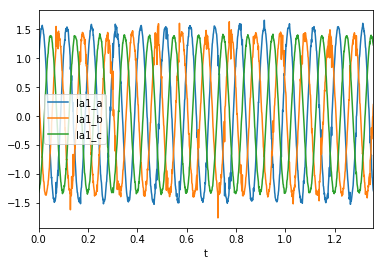

In [301]:
data.filter(regex="^Ia1_a|Ia1_b|Ia1_c$").plot()

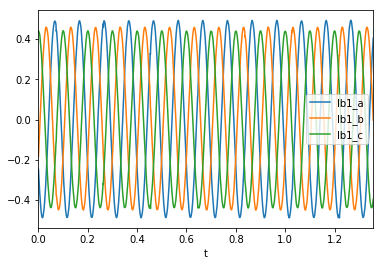

In [302]:
data.filter(regex="^Ib1_a|Ib1_b|Ib1_c$").plot()

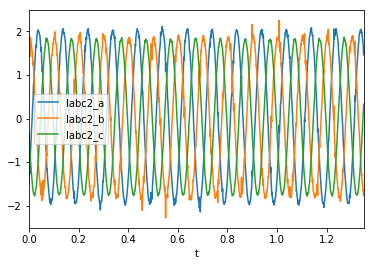

In [268]:
data.filter(regex="^Iabc2_a|Iabc2_b|Iabc2_c$").plot()

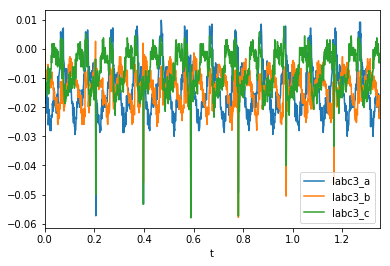

In [269]:
data.filter(regex="^Iabc3_a|Iabc3_b|Iabc3_c$").plot()

In [ ]:
logger.unregister_all()
logger.register('Iabc1_a Iabc1_b Iabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Iabc1_a|Iabc1_b|Iabc1_c$").plot()

In [ ]:
cmd.init_twin_ctrl()


	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log unreg 4
['log unreg 4', 'SUCCESS']
	> log unreg 5
['log unreg 5', 'SUCCESS']
	> log unreg 6
['log unreg 6', 'SUCCESS']
	> log unreg 7
['log unreg 7', 'SUCCESS']
	> log unreg 8
['log unreg 8', 'SUCCESS']
	> log unreg 9
['log unreg 9', 'SUCCESS']
	> log unreg 10
['log unreg 10', 'SUCCESS']
	> log unreg 11
['log unreg 11', 'SUCCESS']
	> log reg 0 LOG_vabc1_a 1213376 1000 double
['log reg 0 LOG_vabc1_a 1213376 1000 double', 'SUCCESS']
	> log reg 1 LOG_vabc1_b 1213384 1000 double
['log reg 1 LOG_vabc1_b 1213384 1000 double', 'SUCCESS']
	> log reg 2 LOG_vabc1_c 1213392 1000 double
['log reg 2 LOG_vabc1_c 1213392 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_vabc1_a           0

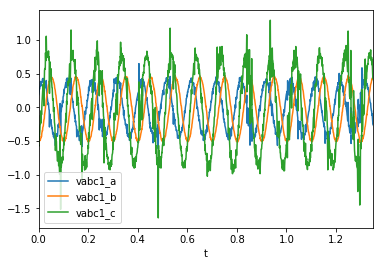

In [303]:
logger.unregister_all()
logger.register('vabc1_a vabc1_b vabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^vabc1_a|vabc1_b|vabc1_c$").plot()

In [371]:
logger.unregister_all()
logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()
cmd.twin_set_freq(10)
cmd.twin_set_trq(0,5)
cmd.twin_set_s1(0,1)
cmd.twin_set_s2(0,1)
# DATA IS BEING RECORDED
time.sleep(1)


logger.stop()


	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_Itq_d_ref 1213448 1000 double
['log reg 0 LOG_Itq_d_ref 1213448 1000 double', 'SUCCESS']
	> log reg 1 LOG_Itq_q_ref 1213456 1000 double
['log reg 1 LOG_Itq_q_ref 1213456 1000 double', 'SUCCESS']
	> log reg 2 LOG_Itq_d 1213496 1000 double
['log reg 2 LOG_Itq_d 1213496 1000 double', 'SUCCESS']
	> log reg 3 LOG_Itq_q 1213504 1000 double
['log reg 3 LOG_Itq_q 1213504 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Itq_d_ref         0            double              1000.0                0       
LOG_Itq_q_ref         1            double              1000.0                0       
LOG_Itq_d             2            double              1000.0                0       
LOG

	> log dump bin 0
Dumping: LOG_Itq_d_ref
Dump took: 0.926  sec
Dump rate: 1474.423  sps
Num samples: 1365 

	> log dump bin 1
Dumping: LOG_Itq_q_ref
Dump took: 0.915  sec
Dump rate: 1491.721  sps
Num samples: 1365 

	> log dump bin 2
Dumping: LOG_Itq_d
Dump took: 0.921  sec
Dump rate: 1482.093  sps
Num samples: 1365 

	> log dump bin 3
Dumping: LOG_Itq_q
Dump took: 0.921  sec
Dump rate: 1482.072  sps
Num samples: 1365 



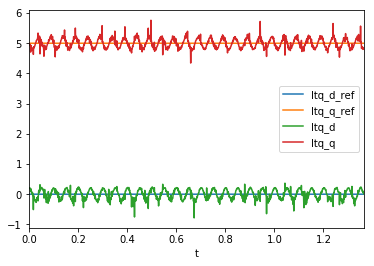

In [372]:

data = logger.dump(file = 'test_data.csv')
data
data.filter(regex="^Itq_d_ref|Itq_q_ref|Itq_d|Itq_q$").plot()

In [187]:
logger.unregister_all()
logger.register('Is1_d_ref Is1_q_ref Is1_d Is1_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_Is1_d_ref 1213368 1000 double
['log reg 0 LOG_Is1_d_ref 1213368 1000 double', 'SUCCESS']
	> log reg 1 LOG_Is1_q_ref 1213376 1000 double
['log reg 1 LOG_Is1_q_ref 1213376 1000 double', 'SUCCESS']
	> log reg 2 LOG_Is1_d 1213416 1000 double
['log reg 2 LOG_Is1_d 1213416 1000 double', 'SUCCESS']
	> log reg 3 LOG_Is1_q 1213424 1000 double
['log reg 3 LOG_Is1_q 1213424 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Is1_d_ref         0            double              1000.0                0       
LOG_Is1_q_ref         1            double              1000.0                0       
LOG_Is1_d             2            double              1000.0                0       
LOG

	> log dump bin 0
Dumping: LOG_Is1_d_ref
Dump took: 1.016  sec
Dump rate: 1330.090  sps
Num samples: 1352 

	> log dump bin 1
Dumping: LOG_Is1_q_ref
Dump took: 0.916  sec
Dump rate: 1476.395  sps
Num samples: 1352 

	> log dump bin 2
Dumping: LOG_Is1_d
Dump took: 0.907  sec
Dump rate: 1490.401  sps
Num samples: 1352 

	> log dump bin 3
Dumping: LOG_Is1_q
Dump took: 0.920  sec
Dump rate: 1469.433  sps
Num samples: 1352 



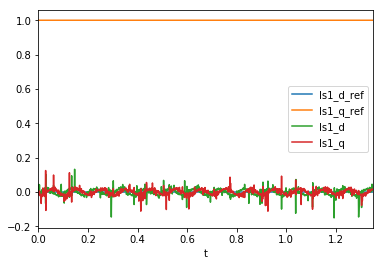

In [188]:
data = logger.dump(file = 'test_data.csv')
data
data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log reg 0 LOG_v_tq_d 1213608 1000 double
['log reg 0 LOG_v_tq_d 1213608 1000 double', 'SUCCESS']
	> log reg 1 LOG_v_tq_q 1213616 1000 double
['log reg 1 LOG_v_tq_q 1213616 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_v_tq_d            0            double              1000.0                0       
LOG_v_tq_q            1            double              1000.0                0       

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']
	> log dump bin 0
Dumping: LOG_v_tq_d
Dump took: 0.993  sec
Dump rate: 1356.025  sps
Num samples: 1346 

	> log dump bin 1
Dumping: LOG_v_tq_q
Dump took: 0.937  sec
Dump rate: 1435.913  sps
Num samples: 1346 



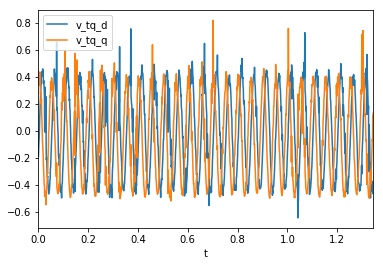

In [316]:

logger.unregister_all()
logger.register('v_tq_d v_tq_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^v_tq_d|v_tq_q$").plot()

	> log reg 0 LOG_we_tq 1213536 1000 double
['log reg 0 LOG_we_tq 1213536 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_we_tq             0            double              1000.0                0       

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']
	> log dump bin 0
Dumping: LOG_we_tq
Dump took: 0.889  sec
Dump rate: 1520.874  sps
Num samples: 1352 



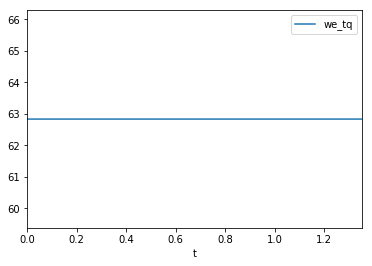

In [234]:
logger.unregister_all()
logger.register('we_tq', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^we_tq$").plot()